# Assignment 2 - Logistic Regression Decision Boundaries
* Import Dataset
* Visualize data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
data= pd.read_csv('C:\Users\Niko\Documents\ML Assignments\A2 - Logistic Regression\Data\ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [3]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


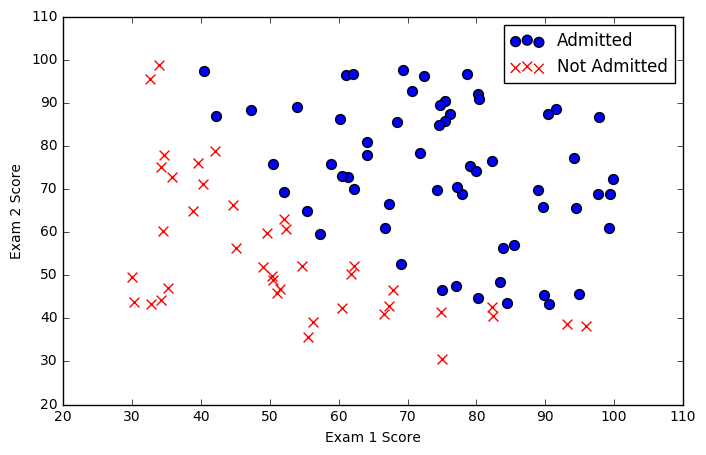

In [5]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# Prepare Data for Matrix calc and Cost Function

In [6]:
def transform_data(data):
    data.insert(0, 'Ones', 1)
    theta = np.array(np.zeros(data.shape[1]-1))
    X = np.array(data.iloc[:,:data.shape[1]-1])
    y = np.array(data.iloc[:,data.shape[1]-1:data.shape[1]])
    return theta,X,y

In [7]:
theta,X,y = transform_data(data)

In [8]:
theta.shape, X.shape, y.shape

((3L,), (100L, 3L), (100L, 1L))

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
theta = np.matrix(theta)

In [14]:
theta.size

3

# Prepare Cost Function

In [54]:
def computeCost(theta,X, y):
    X = np.matrix(X)
    y= np.matrix(y)
    theta = np.matrix(theta)
    
    left = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    right = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return  np.sum(left - right) /len(X)

In [55]:
cost = computeCost(theta,X,y)
cost

0.69314718055994529

# Prepare Gradiant Function for Logistic
Here the approach will be to take on the gradiant using scipy commands tk minimize the function. This removes the need for an alpha and number of iterations to be included in the code

In [27]:
def gradient(theta,X,y):
    
    X = np.matrix(X)
    y= np.matrix(y)
    theta = np.matrix(theta)
    
    parameters = int(theta.shape[1])
    
    grad = np.zeros(parameters)
    error_term = sigmoid(X*theta.T)-y
    for i in range(parameters):
        
        grad[i] = sum(np.multiply(error_term,X[:,i])) / len(X)
        
    return grad

In [28]:
grad = gradient(theta,X,y)
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [58]:
theta

array([ 0.,  0.,  0.])

# Apply fminfunc from Octane logic using scipy's Newton Method

In [59]:
import scipy.optimize as opt

In [62]:
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131852,   0.20623159,   0.20147148]), 36, 0)

In [63]:
computeCost(result[0],X,y)

0.20349770158947492

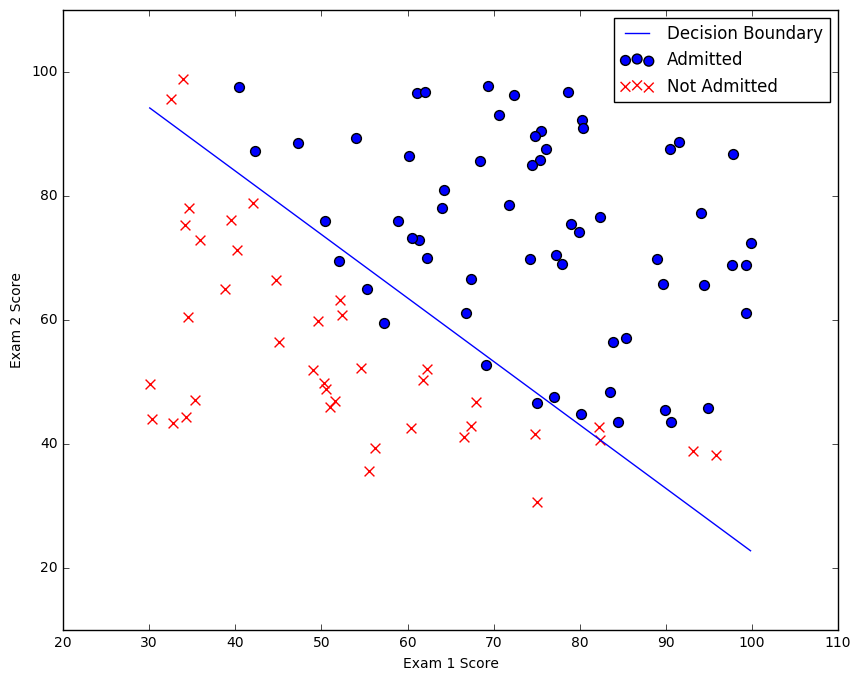

In [64]:
theta_nw = result[0]
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = -(theta_nw[0] + theta_nw[1]*boundary_xs)/theta_nw[2]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# Compute Accuracy (remember function properties)

In [65]:
def predict(theta,X):
    prob = sigmoid(X*theta.T)
    return np.array(prob)

In [66]:
p = pd.Panel({'predictions': predict(np.matrix(result[0]),X) , 'output' : y})
pd1 = p['predictions']
pd1['Prediction'] = pd1[0].apply(lambda x: 1 if x >= 0.5 else 0)
pd1['output'] = p['output']
pd2 = pd1[['Prediction','output']]
pd2['result'] = pd2.apply(lambda x : 1 if x['Prediction'] == x['output'] else 0 ,axis=1)

In [67]:
accuracy = int((float(pd2['result'].sum())/pd2.shape[0]) *100)

In [68]:
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89%


# Next Step is Regularization

In [69]:
data2 = pd.read_csv('C:\Users\Niko\Documents\ML Assignments\A2 - Logistic Regression\Data\ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])

In [70]:
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [71]:
data2.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


# Visualize New data

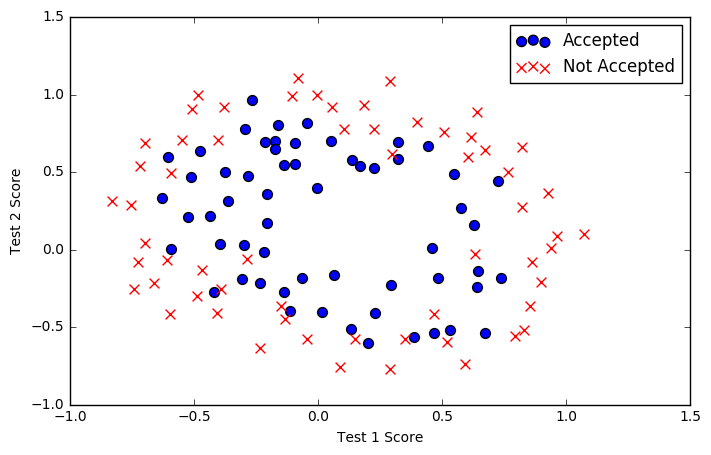

In [72]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Not Accepted')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

# Create a 28 dimensional vector of all features

In [73]:
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [74]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [75]:
X = data2[['Test 1','Test 2']]

In [124]:
X

array([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
          6.29470940e-04,   8.58939846e-03,   1.17205992e-01],
       [  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          1.89305413e-03,  -1.39810280e-02,   1.03255971e-01],
       [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          1.04882142e-02,  -3.39734512e-02,   1.10046893e-01],
       ..., 
       [  1.00000000e+00,  -4.84450000e-01,   9.99270000e-01, ...,
          2.34007252e-01,  -4.82684337e-01,   9.95627986e-01],
       [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          4.00328554e-05,  -6.31330588e-03,   9.95627986e-01],
       [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
          3.51474517e-07,  -1.70067777e-08,   8.22905998e-10]])

In [82]:
X2 = pd.DataFrame(pf(degree=6, interaction_only=False, include_bias=True).fit_transform(X)).rename(columns = lambda x : 'x'+ str(x))

In [83]:
X2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [84]:
theta = np.array(np.zeros(X2.shape[1]))
X = np.array(X2)
y = np.array(data2.iloc[:,data2.shape[1]-1:data2.shape[1]])

In [85]:
theta.shape, X.shape, y.shape

((28L,), (118L, 28L), (118L, 1L))

# Cost Function with Reguralization

In [86]:
def costReg(theta,X, y, lamda):
    X = np.matrix(X)
    y= np.matrix(y)
    theta = np.matrix(theta)
    parameters = int(theta.shape[1])
    grad = np.zeros(parameters)
    
    left = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    right = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    full = np.sum(left - right) /len(X)
    
    for i in range(parameters):
        
        if i == 0:
            grad[i] = 0
        else:
            grad[i] =  np.power(theta[:,i],2)
        
    
    
    return  full + (lamda / 2*len(X)) * np.sum(grad)

In [87]:
costReg(theta,X, y, 1.0)

0.6931471805599454

# Gradient with Reguralization

In [88]:
def gradientReg(theta,X,y,lamda):
    
    X = np.matrix(X)
    y= np.matrix(y)
    theta = np.matrix(theta)
    
    parameters = int(theta.shape[1])
    
    grad = np.zeros(parameters)
    error_term = sigmoid(X*theta.T)-y
    for i in range(parameters):
        
        logit = np.multiply(error_term,X[:,i])
        
        if i == 0:
            grad[i] = sum(logit) / len(X)
        else:
            grad[i] = (sum(logit) / len(X)) + (lamda/len(X)) * theta[:,i]
        
    return grad

In [89]:
gradientReg(theta,X,y,1.0)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [90]:
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y,1.0))
result

(array([  2.49642101e-04,   1.37412210e-04,   2.77015718e-04,
         -4.35864078e-04,  -1.62448948e-04,  -2.48688925e-04,
          3.40749756e-05,  -7.16770657e-05,  -7.34917562e-05,
         -2.03234110e-05,  -3.10561480e-04,  -1.49838662e-05,
         -1.31827230e-04,  -4.36566798e-05,  -2.29977350e-04,
         -3.43136019e-05,  -4.33023449e-05,  -1.87922683e-05,
         -5.59544332e-05,  -5.21230802e-05,  -9.08331875e-05,
         -2.10980446e-04,   2.17305038e-06,  -6.54197622e-05,
         -8.84399297e-07,  -6.91288881e-05,  -1.78749950e-05,
         -1.85528575e-04]), 97, 1)

In [91]:
computeCost(result[0],X,y)

0.6930756298800973

# Compute Accuracy

In [153]:
def accuracy(X,y_pred):
    p = pd.Panel({'predictions': predict(np.matrix(y_pred),X) , 'output' : y})
    pd1 = p['predictions']
    pd1['Prediction'] = pd1[0].apply(lambda x: 1 if x >= 0.5 else 0)
    pd1['output'] = p['output']
    pd2 = pd1[['Prediction','output']]
    pd2['result'] = pd2.apply(lambda x : 1 if x['Prediction'] == x['output'] else 0 ,axis=1)
    accuracy = int((float(pd2['result'].sum())/pd2.shape[0]) *100)
    
    return accuracy


In [154]:
accuracy(X,result[0])

80

In [94]:
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y,0.0))
result2

(array([   6.29375588,    5.01930277,    3.46633543,  -57.92825634,
         -23.99738222,  -22.72372669,  -49.49971915,  -29.30436058,
           1.77391798,    1.73862352,  217.0749724 ,  141.98386615,
         217.88975037,   71.6710834 ,   35.55269953,  103.73932562,
         142.00304965,  157.55449749,   71.94647625,    3.15931043,
           7.134757  , -275.51838567, -311.41438205, -439.61568063,
        -236.81295596, -351.98558497, -132.63883399,  -40.70064458]), 280, 3)

In [95]:
computeCost(result2[0],X,y)

0.26183596378529289

In [96]:
accuracy(X,result2[0])

accuracy = 86%


In [121]:
result3 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y,100.0))
result3[0]

array([  2.80288334e-07,  -2.05609629e-06,   1.19522592e-06,
        -6.63748166e-06,  -1.70320396e-06,  -4.35586913e-06,
        -2.21189089e-06,  -9.15885263e-07,  -1.10594208e-06,
        -2.56284680e-06,  -5.33382812e-06,  -2.99639823e-07,
        -1.71675991e-06,  -4.57304680e-07,  -4.92172701e-06,
        -2.56391935e-06,  -5.75500924e-07,  -4.37902083e-07,
        -7.65809051e-07,  -6.32965557e-07,  -3.79087302e-06,
        -4.21777888e-06,  -1.32363083e-07,  -8.63375665e-07,
        -4.84926553e-08,  -9.74377937e-07,  -2.04808624e-07,
        -4.94728798e-06])

In [98]:
computeCost(result3[0],X,y)

0.69314556676286232

In [99]:
accuracy(X,result3[0])

accuracy = 56%


In [132]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))

np.append(xvals,yvals),zvals


(array([-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0.08163265, -0.03061224,
         0.02040816,  0.07142857,  0.12244898,  0.17346939,  0.2244898 ,
         0.2755102 ,  0.32653061,  0.37755102,  0.42857143,  0.47959184,
         0.53061224,  0.58163265,  0.63265306,  0.68367347,  0.73469388,
         0.78571429,  0.83673469,  0.8877551 ,  0.93877551,  0.98979592,
         1.04081633,  1.09183673,  1.14285714,  1.19387755,  1.24489796,
         1.29591837,  1.34693878,  1.39795918,  1.44897959,  1.5       ,
        -1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0.0

In [141]:
def plotData():
    positive = data2[data2['Accepted'].isin([1])]
    negative = data2[data2['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Not Accepted')
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')

In [142]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [151]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta2 =  opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y,mylambda))[0]
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in xrange(len(xvals)):
        for j in xrange(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta2,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    
    
    fmtttl = accuracy(X,theta2)
    fmt2 = 'accuracy = {0}%'.format(fmtttl)
    plt.title("Decision Boundary " + fmt2)

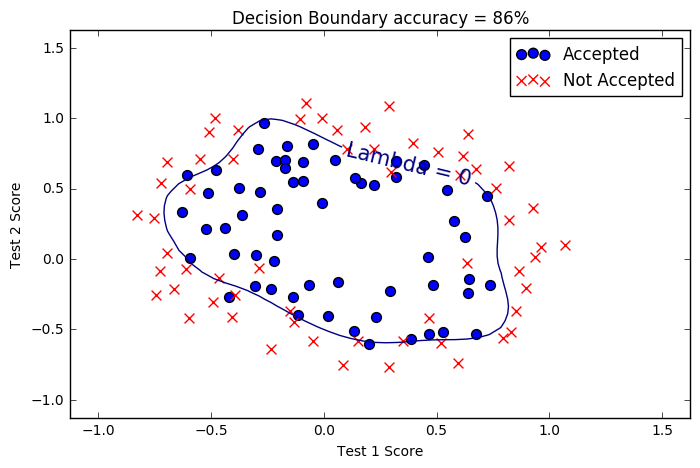

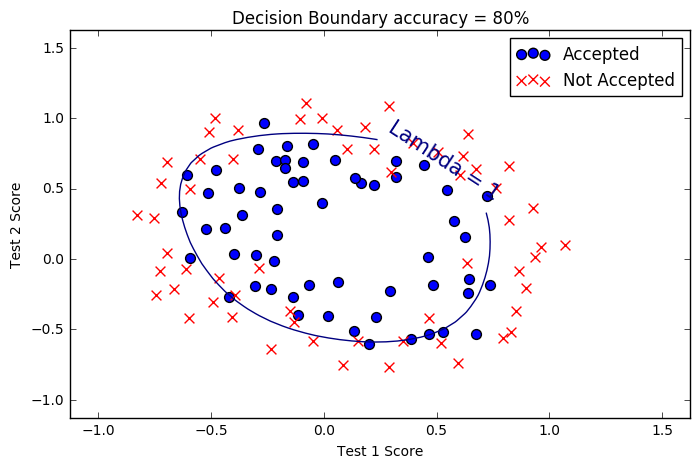

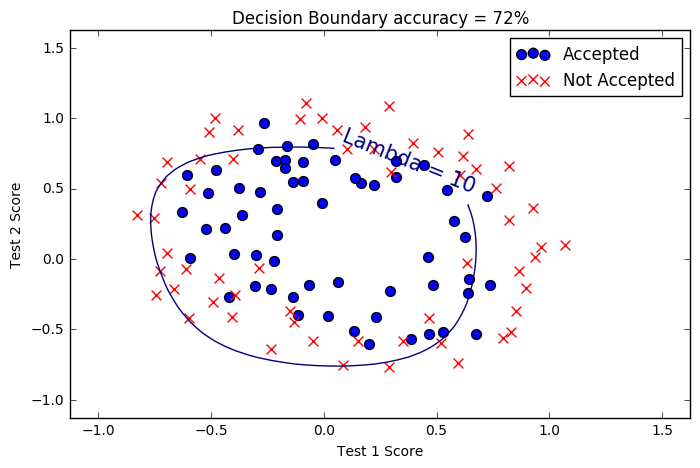

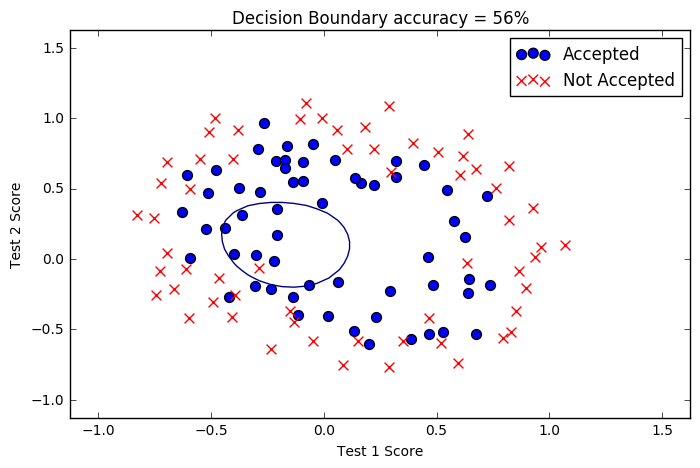

In [155]:
plotData()
plotBoundary(theta,X,y,0.)

plotData()
plotBoundary(theta,X,y,1.)

plotData()
plotBoundary(theta,X,y,10.)

plotData()
plotBoundary(theta,X,y,100.)